In [14]:
import pandas as pd

file_path = '/data/challenge2_files/rapamycinTrain.tsv'

df = pd.read_csv(file_path, sep='\t')

df.head()


,Rapamycin_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,1,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,1,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,1,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Load the training and test datasets
train_data_path = '/data/challenge2_files/rapamycinTrain.tsv'
test_data_path = '/data/testData.tsv'
train_df = pd.read_csv(train_data_path, sep='\t')
test_df = pd.read_csv(test_data_path, sep='\t')

#found column of interest using correaltion with target variable - trial and error threshhold 0.4
# Columns to include for modeling
columns_of_interest = ['mut_FAT4', 'rna_COL4A1', 'rna_CMTM8', 'rna_ADAMTS1', 'rna_MOB3A', 'rna_MR1', 'rna_MAOA', 'rna_ETV4', 'rna_FBN1', 'rna_GLIS1', 'rna_CLMP', 'rna_SPOCD1', 'rna_ZNF511', 'rna_HIVEP1', 'rna_HSD17B11', 'rna_SORD', 'rna_SPRY4', 'rna_TAGLN', 'rna_SYNC', 'mut_SACS', 'rna_GLIDR', 'rna_IL32', 'rna_MAPKAPK2', 'rna_INHBA', 'rna_VCAN', 'rna_LOC728673', 'rna_KIAA0513', 'rna_TNFRSF11B', 'rna_COL4A2', 'rna_SCNN1A', 'rna_ERV3-1', 'rna_MCOLN2', 'rna_SYNPO', 'rna_CMTM7', 'rna_TP73', 'rna_CTBP2', 'rna_ERGIC1', 'rna_RIC1', 'rna_HDAC7', 'rna_LINC01315', 'rna_ITPR2', 'rna_COL5A1', 'rna_ARHGEF39', 'rna_COL6A3', 'rna_NID2', 'rna_RRAD', 'mut_SPTA1', 'rna_MYLK', 'rna_NDRG2', 'rna_TAPBP', 'mut_PLXNA4', 'rna_FSTL1', 'rna_MICAL2', 'rna_PDE9A', 'rna_INSIG1', 'rna_GLIPR1', 'rna_BLVRA', 'rna_SLC22A18', 'rna_GLI3', 'rna_LOC283788', 'rna_PLEKHB1', 'rna_GPR176', 'rna_TMEM231', 'rna_CDH2', 'rna_PLXDC2', 'rna_TLE4', 'rna_SPRY4-IT1', 'rna_IKBKE', 'rna_TRIM7', 'rna_FGFR1', 'rna_ABHD17C', 'rna_TMEM177', 'rna_COL8A1', 'rna_MAP3K7CL', 'rna_COL12A1', 'rna_ADAMTS5', 'rna_ACTA2', 'rna_CSF1', 'rna_ZNF117', 'rna_BEND6', 'rna_C2orf82', 'rna_VEGFC', 'rna_CDH13', 'rna_PDGFA', 'rna_TMEM180', 'rna_MEGF6', 'rna_TLE6', 'rna_TCF7L2', 'rna_PACS1', 'rna_PIGN', 'rna_MAL', 'rna_KDELC1', 'rna_CXCL12', 'rna_PAK1', 'rna_AFF3', 'rna_CCDC80', 'rna_FADS3', 'rna_LGALS1', 'rna_NRP1', 'rna_ADGRG5', 'rna_ITGA6', 'rna_SCARNA13', 'rna_MPZL1', 'rna_FEZF1-AS1', 'rna_RNF43', 'rna_CXCL8', 'rna_TRIM2', 'rna_QDPR']
test_df['Rapamycin_response'] = 0

# Ensure both dataframes have the same columns, excluding 'Rapamycin_response'
common_columns = set(train_df.columns) & set(test_df.columns)
common_columns.discard('Rapamycin_response')

# Keep only the common columns in both datasets
columns_of_interest = list(set(columns_of_interest).intersection(common_columns))

# Keep only the specified columns in both datasets
train_df = train_df[['Rapamycin_response'] + columns_of_interest]
test_df = test_df[['Rapamycin_response'] + columns_of_interest]

# Assuming 'Rapamycin_response' is the target column
target_column = 'Rapamycin_response'

# Assuming your features are all columns except the target column
features = [col for col in train_df.columns if col != target_column]

# Identify categorical columns
categorical_columns = train_df[features].select_dtypes(include=['object']).columns.tolist()

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])
    test_df[column] = label_encoder.transform(test_df[column])

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(train_df[features])
X_test_std = scaler.transform(test_df[features])

# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, train_df[target_column])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_std)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train_resampled, test_size=0.2, random_state=42)

# Define the XGBoost classifier with regularization and lower learning rate
final_xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,  # Adjust as needed
    max_depth=5,  # Increase this parameter
    min_child_weight=3,  # Increase this parameter
    learning_rate=0.05,  # Lower the learning rate
    random_state=42
)


# Use early stopping during training
eval_set = [(X_train, y_train), (X_val, y_val)]
final_xgb_classifier.fit(
    X_train,
    y_train,
    eval_metric="logloss",
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True
)

# Make predictions on the test set
y_test_pred = final_xgb_classifier.predict(X_test_pca)
y_test_pred_prob = final_xgb_classifier.predict_proba(X_test_pca)[:, 1]

# Display the predictions and the updated test_df with row numbers
test_df['Rapamycin_response'] = y_test_pred
result_df = test_df[['Rapamycin_response']]
print(result_df)

# Evaluate the model on the validation set
y_val_pred = final_xgb_classifier.predict(X_val)
y_val_pred_prob = final_xgb_classifier.predict_proba(X_val)[:, 1]

# Print additional evaluation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(f"Precision: {precision_score(y_val, y_val_pred)}")
print(f"Recall: {recall_score(y_val, y_val_pred)}")
print(f"F1 Score: {f1_score(y_val, y_val_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_val_pred_prob)}")
a = result_df['Rapamycin_response'].tolist()

[0]	validation_0-logloss:0.66983	validation_1-logloss:0.66824
[1]	validation_0-logloss:0.64838	validation_1-logloss:0.64525
[2]	validation_0-logloss:0.62861	validation_1-logloss:0.62966
[3]	validation_0-logloss:0.61023	validation_1-logloss:0.60977
[4]	validation_0-logloss:0.58903	validation_1-logloss:0.60041
[5]	validation_0-logloss:0.57294	validation_1-logloss:0.58266
[6]	validation_0-logloss:0.55399	validation_1-logloss:0.57437
[7]	validation_0-logloss:0.53631	validation_1-logloss:0.56664
[8]	validation_0-logloss:0.52284	validation_1-logloss:0.55126
[9]	validation_0-logloss:0.50692	validation_1-logloss:0.54437
[10]	validation_0-logloss:0.49200	validation_1-logloss:0.53792
[11]	validation_0-logloss:0.48062	validation_1-logloss:0.52446
[12]	validation_0-logloss:0.46822	validation_1-logloss:0.51886
[13]	validation_0-logloss:0.45806	validation_1-logloss:0.50664
[14]	validation_0-logloss:0.44835	validation_1-logloss:0.50090
[15]	validation_0-logloss:0.43927	validation_1-logloss:0.48974
[1

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


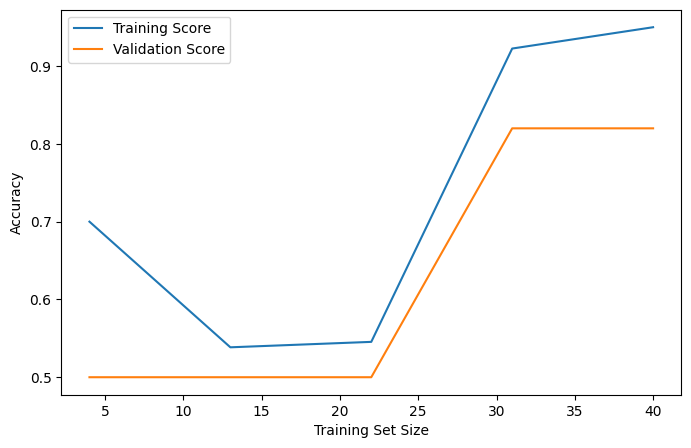

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(final_xgb_classifier, X_train_pca, y_train_resampled, cv=5)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')  # Change to the appropriate metric
plt.legend()
plt.show()


In [3]:
import pandas as pd


columns_of_interest = ['mut_FAT4', 'rna_COL4A1', 'rna_CMTM8', 'rna_ADAMTS1', 'rna_MOB3A', 'rna_MR1', 'rna_MAOA', 'rna_ETV4', 'rna_FBN1', 'rna_GLIS1', 'rna_CLMP', 'rna_SPOCD1', 'rna_ZNF511', 'rna_HIVEP1', 'rna_HSD17B11', 'rna_SORD', 'rna_SPRY4', 'rna_TAGLN', 'rna_SYNC', 'mut_SACS', 'rna_GLIDR', 'rna_IL32', 'rna_MAPKAPK2', 'rna_INHBA', 'rna_VCAN', 'rna_LOC728673', 'rna_KIAA0513', 'rna_TNFRSF11B', 'rna_COL4A2', 'rna_SCNN1A', 'rna_ERV3-1', 'rna_MCOLN2', 'rna_SYNPO', 'rna_CMTM7', 'rna_TP73', 'rna_CTBP2', 'rna_ERGIC1', 'rna_RIC1', 'rna_HDAC7', 'rna_LINC01315', 'rna_ITPR2', 'rna_COL5A1', 'rna_ARHGEF39', 'rna_COL6A3', 'rna_NID2', 'rna_RRAD', 'mut_SPTA1', 'rna_MYLK', 'rna_NDRG2', 'rna_TAPBP', 'mut_PLXNA4', 'rna_FSTL1', 'rna_MICAL2', 'rna_PDE9A', 'rna_INSIG1', 'rna_GLIPR1', 'rna_BLVRA', 'rna_SLC22A18', 'rna_GLI3', 'rna_LOC283788', 'rna_PLEKHB1', 'rna_GPR176', 'rna_TMEM231', 'rna_CDH2', 'rna_PLXDC2', 'rna_TLE4', 'rna_SPRY4-IT1', 'rna_IKBKE', 'rna_TRIM7', 'rna_FGFR1', 'rna_ABHD17C', 'rna_TMEM177', 'rna_COL8A1', 'rna_MAP3K7CL', 'rna_COL12A1', 'rna_ADAMTS5', 'rna_ACTA2', 'rna_CSF1', 'rna_ZNF117', 'rna_BEND6', 'rna_C2orf82', 'rna_VEGFC', 'rna_CDH13', 'rna_PDGFA', 'rna_TMEM180', 'rna_MEGF6', 'rna_TLE6', 'rna_TCF7L2', 'rna_PACS1', 'rna_PIGN', 'rna_MAL', 'rna_KDELC1', 'rna_CXCL12', 'rna_PAK1', 'rna_AFF3', 'rna_CCDC80', 'rna_FADS3', 'rna_LGALS1', 'rna_NRP1', 'rna_ADGRG5', 'rna_ITGA6', 'rna_SCARNA13', 'rna_MPZL1', 'rna_FEZF1-AS1', 'rna_RNF43', 'rna_CXCL8', 'rna_TRIM2', 'rna_QDPR']


count_values = len(columns_of_interest)


print(count_values)


108


In [22]:
import pandas as pd

# Load the existing CSV file
existing_file_path = '/results/Code_sharks_model_info.csv'
existing_df = pd.read_csv(existing_file_path)

# Values for the second column
fifth_column_values = ['Rapamycin_response.ipynb', 'XGboost', '91', '108', 'correaltion with target variable - trial and error threshhold 0.4', "'mut_FAT4', 'rna_COL4A1', 'rna_CMTM8', 'rna_ADAMTS1', 'rna_MOB3A', 'rna_MR1', 'rna_MAOA', 'rna_ETV4', 'rna_FBN1', 'rna_GLIS1', 'rna_CLMP', 'rna_SPOCD1', 'rna_ZNF511', 'rna_HIVEP1', 'rna_HSD17B11', 'rna_SORD', 'rna_SPRY4', 'rna_TAGLN', 'rna_SYNC', 'mut_SACS', 'rna_GLIDR', 'rna_IL32', 'rna_MAPKAPK2', 'rna_INHBA', 'rna_VCAN', 'rna_LOC728673', 'rna_KIAA0513', 'rna_TNFRSF11B', 'rna_COL4A2', 'rna_SCNN1A', 'rna_ERV3-1', 'rna_MCOLN2', 'rna_SYNPO', 'rna_CMTM7', 'rna_TP73', 'rna_CTBP2', 'rna_ERGIC1', 'rna_RIC1', 'rna_HDAC7', 'rna_LINC01315', 'rna_ITPR2', 'rna_COL5A1', 'rna_ARHGEF39', 'rna_COL6A3', 'rna_NID2', 'rna_RRAD', 'mut_SPTA1', 'rna_MYLK', 'rna_NDRG2', 'rna_TAPBP', 'mut_PLXNA4', 'rna_FSTL1', 'rna_MICAL2', 'rna_PDE9A', 'rna_INSIG1', 'rna_GLIPR1', 'rna_BLVRA', 'rna_SLC22A18', 'rna_GLI3', 'rna_LOC283788', 'rna_PLEKHB1', 'rna_GPR176', 'rna_TMEM231', 'rna_CDH2', 'rna_PLXDC2', 'rna_TLE4', 'rna_SPRY4-IT1', 'rna_IKBKE', 'rna_TRIM7', 'rna_FGFR1', 'rna_ABHD17C', 'rna_TMEM177', 'rna_COL8A1', 'rna_MAP3K7CL', 'rna_COL12A1', 'rna_ADAMTS5', 'rna_ACTA2', 'rna_CSF1', 'rna_ZNF117', 'rna_BEND6', 'rna_C2orf82', 'rna_VEGFC', 'rna_CDH13', 'rna_PDGFA', 'rna_TMEM180', 'rna_MEGF6', 'rna_TLE6', 'rna_TCF7L2', 'rna_PACS1', 'rna_PIGN'", "'mut_FAT4', 'rna_COL4A1', 'rna_CMTM8', 'rna_ADAMTS1', 'rna_MOB3A', 'rna_MR1', 'rna_MAOA', 'rna_ETV4', 'rna_FBN1', 'rna_GLIS1', 'rna_CLMP', 'rna_SPOCD1', 'rna_ZNF511', 'rna_HIVEP1', 'rna_HSD17B11', 'rna_SORD', 'rna_SPRY4', 'rna_TAGLN', 'rna_SYNC', 'mut_SACS', 'rna_GLIDR', 'rna_IL32', 'rna_MAPKAPK2', 'rna_INHBA', 'rna_VCAN', 'rna_LOC728673', 'rna_KIAA0513', 'rna_TNFRSF11B', 'rna_COL4A2', 'rna_SCNN1A', 'rna_ERV3-1', 'rna_MCOLN2', 'rna_SYNPO', 'rna_CMTM7', 'rna_TP73', 'rna_CTBP2', 'rna_ERGIC1', 'rna_RIC1', 'rna_HDAC7', 'rna_LINC01315', 'rna_ITPR2', 'rna_COL5A1', 'rna_ARHGEF39', 'rna_COL6A3', 'rna_NID2', 'rna_RRAD', 'mut_SPTA1', 'rna_MYLK', 'rna_NDRG2', 'rna_TAPBP', 'mut_PLXNA4', 'rna_FSTL1', 'rna_MICAL2', 'rna_PDE9A', 'rna_INSIG1', 'rna_GLIPR1', 'rna_BLVRA', 'rna_SLC22A18', 'rna_GLI3', 'rna_LOC283788', 'rna_PLEKHB1', 'rna_GPR176', 'rna_TMEM231', 'rna_CDH2', 'rna_PLXDC2', 'rna_TLE4', 'rna_SPRY4-IT1', 'rna_IKBKE', 'rna_TRIM7', 'rna_FGFR1', 'rna_ABHD17C', 'rna_TMEM177', 'rna_COL8A1', 'rna_MAP3K7CL', 'rna_COL12A1', 'rna_ADAMTS5', 'rna_ACTA2', 'rna_CSF1', 'rna_ZNF117', 'rna_BEND6', 'rna_C2orf82', 'rna_VEGFC', 'rna_CDH13', 'rna_PDGFA', 'rna_TMEM180', 'rna_MEGF6', 'rna_TLE6', 'rna_TCF7L2', 'rna_PACS1', 'rna_PIGN', 'rna_MAL', 'rna_KDELC1', 'rna_CXCL12', 'rna_PAK1', 'rna_AFF3', 'rna_CCDC80', 'rna_FADS3', 'rna_LGALS1', 'rna_NRP1', 'rna_ADGRG5', 'rna_ITGA6', 'rna_SCARNA13', 'rna_MPZL1', 'rna_FEZF1-AS1', 'rna_RNF43', 'rna_CXCL8', 'rna_TRIM2', 'rna_QDPR'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'", "'rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1'"]

# Add the second column to the DataFrame
existing_df['Rapamycin_response'] = fifth_column_values

# Save the updated DataFrame to the same CSV file
existing_df.to_csv(existing_file_path, index=False)

# Display the updated DataFrame
print(existing_df)


                   Unnamed: 0  \
0                    Filename   
1              Algorithm used   
2           Training accuracy   
3          Number of Features   
4   Feature evaluation method   
5         Overall key feature   
6          Breast key feature   
7        BrainCNS key feature   
8           Bowel key feature   
9           Blood key feature   
10           Skin key feature   
11           Lung key feature   
12          Ovary key feature   
13       Prostate key feature   
14         Kidney key feature   

                                 Fulvestrant_response  \
0                          Fulvestrant_response.ipynb   
1                                    sklearn_adaboost   
2                                                  95   
3                                                  30   
4                                  Mutual Index score   
5   'rna_LOC100505938', 'rna_ITGA1', 'rna_ZNF296',...   
6   'rna_LOC100505938', 'rna_ITGA1', 'rna_ZNF296',...   
7   'rna_LOC100

In [10]:
# Get feature importances for each sample in the test set
feature_names_per_sample = []

# Assuming final_xgb_classifier is your trained XGBoost model
feature_importances = final_xgb_classifier.feature_importances_

for i, sample in enumerate(X_test_pca):
    # Get the indices of the top features (adjust n_top_features as needed)
    n_top_features = 5  # Adjust this number to get the top N features
    top_feature_indices = feature_importances.argsort()[-n_top_features:][::-1]

    # Get the feature names for the top features
    top_feature_names = [features[idx] for idx in top_feature_indices]

    # Store the top feature names in a list
    feature_names_per_sample.append({'SampleIndex': i, 'TopFeatures': top_feature_names})

# Display the list of top feature names for each sample
for sample_info in feature_names_per_sample:
    print(f"Sample {sample_info['SampleIndex']} Top Features:")
    print(sample_info['TopFeatures'])
    print("\n")


Sample 0 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 1 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 2 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 3 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 4 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 5 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 6 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 7 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']


Sample 8 Top Features:
['rna_ADAMTS1', 'rna_KDELC1', 'rna_NDRG2', 'rna_MPZL1', 'rna_FGFR1']




In [20]:
import pandas as pd

# Load the existing CSV file
existing_file_path = '/results/CodeSharks_model_output.csv'
existing_df = pd.read_csv(existing_file_path)

# Add two additional columns without overwriting existing ones
existing_df['Rapamycin_response'] = a
existing_df['Rapamycin_response_features'] = 'rna_ADAMTS1'

# Save the updated DataFrame to the same CSV file
existing_df.to_csv(existing_file_path, index=False)

# Display the updated DataFrame
print(existing_df)


             Unnamed: 0  Fulvestrant_response Fulvestrant_response_features  \
0    Breast key feature                     0              rna_LOC100505938   
1  BrainCNS key feature                     0              rna_LOC100505938   
2     Bowel key feature                     0              rna_LOC100505938   
3     Blood key feature                     0              rna_LOC100505938   
4      Skin key feature                     1              rna_LOC100505938   
5      Lung key feature                     0              rna_LOC100505938   
6     Ovary key feature                     0              rna_LOC100505938   
7  Prostate key feature                     0              rna_LOC100505938   
8    Kidney key feature                     0              rna_LOC100505938   

   Gefitinib_response Gefitinib_response_features  Mitomycin_response  \
0                   0                 rna_B3GALT1                   1   
1                   0                 rna_B3GALT1              

In [21]:
existing_df

,Unnamed: 0,Fulvestrant_response,Fulvestrant_response_features,Gefitinib_response,Gefitinib_response_features,Mitomycin_response,Mitomycin_response_features,Mitomycin-Fulvestrant_response,Mitomycin-Fulvestrant_response_features,Rapamycin-Gefitinib_response,Rapamycin-Gefitini_features,Rapamycin_response,Rapamycin_response_features
0,Breast key feature,0,rna_LOC100505938,0,rna_B3GALT1,1,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,1,rna_ADAMTS1
1,BrainCNS key feature,0,rna_LOC100505938,0,rna_B3GALT1,1,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,0,rna_ADAMTS1
2,Bowel key feature,0,rna_LOC100505938,0,rna_B3GALT1,1,rna_ENTPD5,0,rna_PLEKHA3,0,rna_PLEKHA3,0,rna_ADAMTS1
3,Blood key feature,0,rna_LOC100505938,1,rna_B3GALT1,0,rna_ENTPD5,0,rna_PLEKHA3,0,rna_PLEKHA3,1,rna_ADAMTS1
4,Skin key feature,1,rna_LOC100505938,1,rna_B3GALT1,1,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,0,rna_ADAMTS1
5,Lung key feature,0,rna_LOC100505938,0,rna_B3GALT1,1,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,1,rna_ADAMTS1
6,Ovary key feature,0,rna_LOC100505938,0,rna_B3GALT1,0,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,0,rna_ADAMTS1
7,Prostate key feature,0,rna_LOC100505938,1,rna_B3GALT1,0,rna_ENTPD5,0,rna_PLEKHA3,0,rna_PLEKHA3,0,rna_ADAMTS1
8,Kidney key feature,0,rna_LOC100505938,0,rna_B3GALT1,0,rna_ENTPD5,1,rna_PLEKHA3,1,rna_PLEKHA3,1,rna_ADAMTS1
